# 包含了整个剑指offer的题目

# 3 数组-找出数组中重复的数字

In [ ]:
bool duplicate(int numbers[], int length, int* duplication)
{
	// 判断数组不为空
	if (numbers == NULL || length <= 0) { return false; }
    
	// 判断数值在制定范围内
	for (int i = 0;i < length;i++)
	{
		if (numbers[i] < 0 || numbers[i]>length - 1)
			return false;
	}
    
	// 从位置0开始交换
	for (int i = 0;i < length;i++)
	{
		while (numbers[i] != i)
		{
			if (numbers[i] == numbers[numbers[i]])
			{
				*duplication = numbers[i];
				return true;
			}
			swap(numbers[i], numbers[numbers[i]]);
		}
	}
	return false;
}

# 3.1 数组-不修改数组找重复数字
* 利用二分法进行数组分割

In [ ]:
int countRange(const int* numbers, int length, int start, int end);

// 参数:
//        numbers:     一个整数数组
//        length:      数组的长度
// 返回值:             
//        正数  - 输入有效，并且数组中存在重复的数字，返回值为重复的数字
//        负数  - 输入无效，或者数组中没有重复的数字
int getDuplication(const int* numbers, int length)
{
    if(numbers == nullptr || length <= 0)
        return -1;

    int start = 1;
    int end = length - 1;
    while(end >= start)
    {
        int middle = ((end - start) >> 1) + start;
        int count = countRange(numbers, length, start, middle);
        if(end == start)
        {
            if(count > 1)
                return start;
            else
                break;
        }

        if(count > (middle - start + 1))
            end = middle;
        else
            start = middle + 1;
    }
    return -1;
}

int countRange(const int* numbers, int length, int start, int end)
{
    if(numbers == nullptr)
        return 0;

    int count = 0;
    for(int i = 0; i < length; i++)
        if(numbers[i] >= start && numbers[i] <= end)
            ++count;
    return count;
}

# 3.2 找出没有重复的数字
* 利用位运算--异或

In [ ]:
int find(int[] arr)
{
    int tmp = arr[0];
    for(int i = 1;i < arr.length; i++){
        tmp = tmp ^ arr[i];
    }
    return tmp;
}

# 4 数组-二维数组中的查找
* 数组由左到右 和 由上到下 均为**递增**；查找某个数
* 以数组的右上角或者左下角为突破口

In [ ]:
bool fintTarget(int* matrix, int target,int row,int column)
{
    // 判断在数的范围内
    if (target<matrix[0][0] || target>matrix[row][column]) return false;
	int row_a = 0, column_a = column - 1;
	
    // 比右上角的数大，则到下一行，否则换到前一列
    while (row_a < row && column >= 0)
	{
		if (matrix[row_a][column_a] == target) return true;
		else if (matrix[row_a][column_a] > target) column_a--;
		else row_a++;
	}
	return false;
}

# 5 字符串-替换空格
* 双指针，一个指向末尾，一个指向拓展后的末尾

In [ ]:
	void replaceSpace(char *str,int length) 
    {
        //判断数据不为空
        if(str == NULL||length<=0)  return;
        //拓展数据长度
        int true_length=0,count_blank=0;
        int i=0;
        while(str[i]!='\0')
        {
            true_length++;
            if(str[i]==' ')
                count_blank++;
            i++;
        }
        //计算拓展后的字符串长度，判断是否在length范围内
        int new_length=true_length+2*count_blank;
        if(new_length>length) return;
        
        //后移，替换
        int a_pointer=true_length;
        int b_pointer=new_length;
        
        while(a_pointer>=0 && a_pointer<b_pointer)
        {
            if(str[a_pointer]!=' ')
            {
                str[b_pointer]=str[a_pointer];
                a_pointer--;
                b_pointer--;
            }
            else
            {
                a_pointer--;
                str[b_pointer--]='0';
                str[b_pointer--]='2';
                str[b_pointer--]='%';
            }
        }
	};

# 6 链表-在链表结尾添加一个节点

In [ ]:
// 单向链表节点定义
struct ListNode
{
	int       L_value;
	ListNode* L_next;
};

// 添加节点
void AddToTail(ListNode**pHead,int value)
{
	ListNode* pNew = new ListNode();
	pNew->L_value = value;
	pNew->L_next = NULL;
    
    //判断首节点是不是空节点
	if (*pHead == NULL)
	{
		*pHead = pNew;
	}
	else
	{
		ListNode* pNode = *pHead;
		while (pNode->L_next != NULL)
			pNode = pNode->L_next;
		pNode->L_next = pNew;
	}
}

# 6.1 链表-删除某个节点

In [ ]:
void Remove(ListNode**pHead,int value)
{
	ListNode* pNew = new ListNode();
	pNew->L_value = value;
	pNew->L_next = NULL;

	if (*pHead == NULL||pHead==NULL)
	{
		return;
	}
	//用来存放待删除的节点
	ListNode*toBedeleted = NULL;
	if ((*pHead)->L_value == value)
	{
		toBedeleted = *pHead;
		*pHead = (*pHead)->L_next;
	}
	else
	{
		ListNode* pNode = (*pHead)->L_next;
		while (pNode != NULL && pNode->L_value != value)
			pNode = pNode->L_next;
		if (pNode != NULL)
		{
			toBedeleted = pNode;
			pNode->L_next = pNode->L_next->L_next;
		}
	}
	if (toBedeleted != NULL)
	{
		delete toBedeleted;
		toBedeleted = NULL;
	}
}

# 6.2 链表-从尾到头打印链表
* 先进后出的情况，用**栈**来实现

In [ ]:
// 循环访问的方法
void PrintValueReverse(ListNode*pHead)
{
	// 声明nodes的栈
	stack<int>nodes;
	ListNode* pNode = pHead;
	while (pNode != NULL)
	{
		nodes.push(pNode->L_value);
		pNode = pNode->L_next;
	}
	
	//输出nodes
	while (nodes.empty())
	{
		cout << nodes.top();
		nodes.pop();
	}
}

// 递归的方法
void PrintValueReverse(ListNode*pHead)
{
	if (pHead!= NULL)
	{
		if (pHead->L_next != NULL)
		{
			PrintValueReverse(pHead->L_next);
		}
		cout << pHead->L_value;
	}
	
}

# 7 树-重建二叉树
[参考](https://www.cnblogs.com/zywu/p/5758917.html)

In [ ]:
class Solution {
public:
	TreeNode* reConstructBinaryTree(vector<int> pre, vector<int> in)
	{
		// 检查输入的正确性
		if (pre.empty() || in.empty() || pre.size() != in.size())
			return NULL;
		return construct(pre, 0,pre.size() - 1, in,0,pre.size()-1);
	}
public:
	TreeNode* construct(vector<int> pre,int ps,int pe, vector<int> in,int is,int ie)
	{
		if (ps > pe) return NULL;

		// 取前序遍历第一个是根节点
		int value = pre[ps];
		// 在中序中找根节点
		int i = 0;
		while (i <= ie && in[i] != value)
		{
			i++;
		}
		// 如果没有找到，则输入不合法，抛出异常
		if (i > ie) return NULL;
		// 创建当前根节点，并赋值
		TreeNode* FinalTree = new TreeNode(value);
		// 递归调用当前节点的左子树
		FinalTree->left = construct(pre, ps + 1, ps + i - is, in, is, i - 1);
		// 递归当前调用节点的右子树
		FinalTree->right = construct(pre, ps + i - is + 1, pe, in, i + 1, ie);

		return FinalTree;
	}
};

# 8 树-二叉树的下一个节点
1. 如果节点有右子节点，则右子节点的最左节点是该节点的下一个节点
1. 如果节点无右子节点，但该节点是其父节点的左子节点，则父节点是该节点的下一个节点
1. 如果节点无右子节点，且该节点是其父节点的右子节点，则沿着父节点向上遍历，满足XXX的父节点是其该节点的下一个节点

In [ ]:
	TreeNode* GetNext(TreeNode* pNode)
	{
		TreeNode* pNext = NULL;

		// 有右子树
		if (pNode->right != NULL)
		{
			if ((pNode->right->left) != NULL)
				pNext = pNode->right->left;
			else pNext = pNode->right;
		}
		//无右子树，有父节点
		else if (pNode->par != NULL)
		{
			TreeNode*pCurrent = pNode;
			TreeNode*pParent = pNode->par;
			while (pParent != NULL && pParent->right == pCurrent)
			{
				pCurrent = pParent;
				pParent = pCurrent->par;
			}
			pNext = pParent;
		}
		return pNext;
	}

# 9 栈和队列-用两个栈实现队列
* 先将树压入第一个栈
* 将第一个栈元素pop出，push进第二个栈
* 第二个栈就是队列的顺序

In [ ]:
    void push(int node) 
    {
        int temple;
        while(!stack2.empty())
        {
            temple=stack2.top();
            stack2.pop();
            stack1.push(temple);
        }
        stack1.push(node);
    }

    int pop() 
    {
        int temple;
        while(!stack1.empty())
        {
            temple=stack1.top();
            stack1.pop();
            stack2.push(temple);
        }
        temple=stack2.top();
        stack2.pop();
        return temple;
    }

# 10 斐波那契数
* 循环方法实现计算
    * 时间复杂度**O(n)**
* [青蛙跳台阶问题](https://www.jianshu.com/p/965d12083d7f)
    * 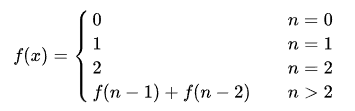

In [ ]:
long long Fibonacci(unsigned n)
{
	int result[2] = { 0,1 };
	if (n < 2)
		return result[n];

	long long fibFront = 0;
	long long fibBack = 1;
	long long fibN = 0;
	for (unsigned int i = 2;i <= n;i++)
	{
		fibN = fibFront + fibBack;

		fibFront = fibBack;
		fibBack = fibN;
	}
	return fibN;
}

# 排序-快排
1. 指定最左端的数为 **pivot**
1. 左指针找第一个大于 pivot 的数
1. 右指针找第一个小于 pivot 的数
1. 交换两个数
1. 大于begin的数都在右，小于的都在左

In [ ]:
void QuickSort(vector<int> &a,int left,int right)
{
	int i = left;
	int j = right;
	int pivot = a[i];
	while (i <= j)
	{
		while (a[i] < pivot) { i++;}
		while (a[j] > pivot) { j--;}
		if (i <= j)
		{
			swap(a[i], a[j]);
			i++;
			j--;
		}
	}
	if (i < right) QuickSort(a, i, right);
	if (j > left) QuickSort(a, left, j);
}

# 排序-归并
1. 递归
1. 合并两个数组的函数
1. 二分排序

In [ ]:
void Merge(vector<int> &a, int l, int m, int r)
{
	// 获取左右部分数组的大小（实际还是原数组）
	int l_c = m - l + 1;
	int r_c = r - m;
	
	// 将数组值赋给临时数组（两个数组）
	int i, j, k;
	vector<int> L(l_c + 1);
	vector<int> R(r_c + 1);
	for (i = 0;i < l_c;i++)
		L[i] = a[l + i];
	for (j = 0;j < r_c;j++)
		R[j] = a[m + 1 + j];

	// 每个数组的最后一个数赋值11111111,任意数与之比较都小
	L[l_c] = 11111111;
	R[r_c] = 11111111;

	//
	for (i = 0, j = 0, k = l;k <= r;k++)
	{
		if (L[i] < R[j])
			a[k] = L[i++];
		else
			a[k] = R[j++];
	}
}


void MergeSort(vector<int> &a, int l, int r)
{
	if (l < r)
	{
		int m = (l + r) / 2;
		MergeSort(a, l, m);
		MergeSort(a, m + 1, r);
		Merge(a, l, m, r);
	}
}

# 排序-堆排
1. 原则
>1. 符合完全二叉树
>1. 父节点大于孩子节点
1. 步骤
>1. 构建最大堆--插入构建
>1. 删除首个->下面的顺次移位

In [ ]:
void insert_p(vector<int> &a, int p)
{
	while (p > 0)
	{
		int parent = (p - 1) / 2;
		if (a[parent] < a[p])
        // if(a[parent] > a[p])
		{
			swap(a[parent], a[p]);
			p = parent;
		}
		else break;
	}
}

void delete_max(vector<int> &a, int length)
{
	int tmp = a[0];
	int index = 0;

	// 找出最大的
	// large指向已遍历的最大值
	// index指向当前空缺位置
	while (1)
	{
		int left = 2 * index + 1;
		int right = 2 * index + 2;
		
		if (left >= length)
			break;
		else 
		{
			int large = a[left] > a[right] ? left : right;
			a[index] = a[large];
			index = large;
		}
	}
	a[index] = a[length];
	a[length] = tmp;

}

void HeapSort(vector<int> &a)
{
	for (int i = 0;i < a.size();i++)
		insert_p(a, i);
	for (int i = a.size() - 1;i > 0;i--)
		delete_max(a, i);
}

# 11 查找-找出旋转数组的最小数字
1. 二分法、双指针
2. 中间与左、右的值都相等时，采用**顺序遍历** MinInOrder

In [ ]:
int MinInOrder(vector<int> &a, int left, int right)
{
	int result = a[left];
	for (int i = left + 1;i <= right;i++)
	{
		if (result > a[i])
			result = a[i];
	}
	return result;
}

int FindMin_Rotate(vector<int> &a)
{
	int left = 0;
	int right = a.size() - 1;
	int mid = 0;
	while (a[left] >= a[right])
	{
		if (right - left == 1)
		{
			mid = right;
			break;
		}

		mid = (left + right) / 2;
		// 若left、mid、right三个指针指的数都相同，则用顺序查找
		if (a[left] == a[right] && a[left] == a[mid])
			return MinInOrder(a, left, right);

		if (a[mid] >= a[left])
			left = mid;
		else if (a[mid] <= a[right])
			right = mid;
	}
	return a[mid];	
}

# 12 回溯法-矩阵中的路径
* 判断数组中是否含有相应字符串

In [ ]:
bool haspath(char* matrix, int rows, int cols,char* str)
{
	// 判断二维数组是否合法
	if (matrix == NULL || rows < 0 || cols < 0)
		return false;

	// 创建访问标志的数组,置为0/false
	bool* visited = new bool[rows*cols];
	memset(visited, 0, rows*cols);

	int pathLength = 0;
	// 在二维数组内循环
	for (int row = 0;row < rows;row++)
	{
		for (int col = 0;col < cols;col++)
		{
			if (haspathcore)
				return true;
		}
	}

	delete[] visited;
	return false;
}

bool haspathcore(char* matrix, int rows, int cols, int row, int col, char* str, int& pathLength, bool* visited)
{
	// 读取到str最后，则返回true
	if (str[pathLength] == '\0')
		return true;

	bool haspath = false;

	if (row >= 0 && row < rows && col >= 0 && col < cols
		&&matrix[row*cols + col] == str[pathLength] 
		&& !visited[row*cols + col])
	{
		pathLength++;
		visited[row*cols + col] = true;
		// 在其上下左右四个方向查找
		haspath = haspathcore(matrix, rows, cols, row - 1, col, str, pathLength, visited)
			|| haspathcore(matrix, rows, cols, row, col - 1, str, pathLength, visited)
			|| haspathcore(matrix, rows, cols, row + 1, col, str, pathLength, visited)
			|| haspathcore(matrix, rows, cols, row, col + 1, str, pathLength, visited);

		if (!haspath)
		{
			--pathLength;
			visited[row*cols + col] = false;
		}
	}
	return haspath;
}

# 14 动态规划-剪绳子
1. 至少被分成2段
2. 求各段最大乘积
3. 动态规划
4. 贪心算法，n>=5时，讨论情况 O(1)

In [ ]:
# 动态规划
int max_cut(int length)
{
	// 排除三个特殊示例
	if (length < 2)
		return 0;
	if (length == 2)
		return 1;
	if (length == 3)
		return 2;

	// 初始化新的数组
	int* arr = new int[length + 1];
	arr[0] = 0;
	arr[1] = 1;
	arr[2] = 2;
	arr[3] = 3;

	int max=0;
	for (int i = 4;i <=length;i++)
	{
		max = 0;
		for (int j = 0;j < i / 2;j++)
		{   
			// 寻找最大
			int count = arr[j] * arr[i - j];
			if (max < arr[i])
				max = arr[i];

			arr[i] = max;
		}
	}
	return arr[length];
}

# 贪心算法
int max1_cut(int length)
{
	// 排除三个特殊示例
	if (length < 2)
		return 0;
	if (length == 2)
		return 1;
	if (length == 3)
		return 2;

	// 能够减3的次数
	int count_3 = length / 3;

	// 余数为1时，则少减一次，4=2*2
	if (length % 3 == 1)
		count_3--;

	// 能够除以2的次数
	int count_2 = (length - count_3) / 2;

	int max = pow(3, count_3)*pow(2, count_2);
	return max;
}

# 15 位运算-二进制中1的个数

In [ ]:
int count_1(int n)
{
	int count = 0;
	while (n)
	{
		count++;
		n = n & (n - 1);
	}
	return count;
}

# 对应剑指offer第三章-高质量的代码
1. 规范性
>* 书写清晰
>* 布局合理
>* 命名合理
2. 完整性
>* 完成基本功能
>* 考虑边界条件
>* 做好错误处理
1. 鲁棒性
>* 采取防御性编程
>* 处理无效输入

# 16 数值的整数次方
1. 位运算的适用范围仅仅是整数
2. 递归算法适用负数

In [ ]:
# 位运算
int pow_test(int m, int n)
{
	int sum = 1;
	int temp = m;
	while (n)
	{
		if (n & 1 == 1)
			sum *= temp;

		n=n >> 1;
		temp *= temp;
	}
	return sum ;
}

# 递归
double pow_try(double m, int n)
{
	if (n == 0)
		return 1.0;
	if (n == 1)
		return m;

	double base = pow_try(m,n>>1);
	base *= base;
	
	if (n & 1 == 1)
		base *= m;

	return base;	
}

# 17 打印 1-最大的n位数
难点：大数--需要将数转化为字符串

# 18 删除连续的重复数-链表

In [ ]:
void deleteDuplication(ListNode** pHead)
{
	if (pHead == nullptr || *pHead == nullptr)
		return;

	ListNode* pPre = nullptr;
	ListNode* pCur = *pHead;

	while (pCur != nullptr)
	{
		ListNode* pNex = pCur->n_next;
		bool needDelete = false;
		if (pNex != nullptr&&pCur->n_value == pNex->n_value)
			needDelete = true;

		if (!needDelete)
		{
			pPre = pCur;
			pCur = pNex;
		}
		else
		{
			int value = pCur->n_value;
			ListNode* pTobeDel = pCur;
			while (pTobeDel != nullptr&&pTobeDel->n_value == value)
			{
				pNex = pTobeDel->n_next;

				delete pTobeDel;
				pTobeDel = nullptr;

				pTobeDel = pNex;
			}

			// 若指针头就是重复，且被删除，后面无后续数字，则
			if (pPre == nullptr)
				*pHead = pNex;
			else
				pPre->n_next = pNex;
			pCur = pNex;
		}
		
	}
}

# 21 调整数组，使奇数在前，偶数在后
* 借鉴快排的方法
* 可以将__(a[i] & 1) == 1__转换成一个函数__fun(n)__，增强其泛化能力 

In [ ]:
void changearray(vector<int> &a)
{
	//int tmp = a[0];
	int i = 0;
	int j = a.size() - 1;
	while (i <= j)
	{
		while ((a[i] & 1) == 1) { i++; }
		while ((a[j] & 1) == 0) { j--; }

		if (i <= j)
		{
			swap(a[i], a[j]);
			cout << "i is " << a[i] << ' ' << "j is " << a[j] << "\n";
			i++;
			j--;
		}
	}	
}

# 22 链表中倒数第K个节点
* 双指针
* 第一个指针到（k-1）时，第二个与第一个开始同步前进
* 增加测试样例，提高鲁棒性

In [ ]:
ListNode* FindKthNode(ListNode*pListHead, int k)
{
	if (pListHead == NULL || k == 0)
		return NULL;
	
	ListNode* ANode = pListHead;
	ListNode* BNode = ANode;

	for (int i = 0;i < k - 1;i++)
		ANode = ANode->n_next;

	while (ANode->n_next)
	{
		ANode = ANode->n_next;
		BNode = BNode->n_next;
	}
	return BNode;
}

# 23 链表中*环*的入口节点
1. 先判断是否有环：双指针，一快一慢，快的追上慢的，则有环
2. 找入口：双指针，第一个比第二个多环的节点数n

# 24 反转链表

In [ ]:
ListNode* ReverseList(ListNode* pHead)
{
	// 定义三个循环节点
    ListNode* pre;
	ListNode* curr;
	ListNode* follow;
    
    // 初始化
	pre = pHead;
	curr = pHead->n_next;
	follow = curr->n_next;
    
    // 循环，每次改变一个节点的指针方向
	pHead->n_next = NULL;
	while (follow!=NULL)
	{
		curr->n_next = pre;
		pre = curr;
		curr = follow;
		follow = follow->n_next;
	}
	curr->n_next = pre;
}

# 25 合并两个排序好的链表

In [ ]:
ListNode*Merge(ListNode* pHead1, ListNode* pHead2)
{
	if (pHead1 == NULL)
		return pHead2;
	if (pHead2 == NULL)
		return pHead1;

	ListNode* MergedHead = NULL;
	if (pHead1->n_next < pHead2->n_next)
	{
		MergedHead = pHead1;
		MergedHead->n_next = Merge(pHead1->n_next,pHead2);
	}
	else
	{
		MergedHead = pHead2;
		MergedHead->n_next = Merge(pHead1,pHead2->n_next);
	}
	return MergedHead;
}

# 26 判断B是否是A的子结构-树
* 子树不单单只有两层
* 若树的值不是__int__型，则不能直接用等号判断大小

In [ ]:
bool a_include_b(BinaryTree* father, BinaryTree* son)
{
	if (son == nullptr)
		return true;
	if (father == nullptr)
		return false;
	if (father->p_value != son->p_value)
		return false;

	return a_include_b(father->p_left, son->p_left) && a_include_b(father->p_right, son->p_right);
}

bool SonTree(BinaryTree* father, BinaryTree* son)
{
	bool result = false;
	if (father != nullptr &&son != nullptr)
	{
		if (father->p_value == son->p_value)
			result = a_include_b(father, son);

		if (!result)
			result = SonTree(father->p_left, son);

		if(!result)
			result = SonTree(father->p_right, son);
	}
	return result;
}

# 对应剑指offer第四章--解决面试题的思路
1.  抽象问题具体化
>1. 画图
>1. 举例

1. 分解让复杂问题简单化

# 27 二叉树的镜像
* 树不一定必须是完全二叉树
* 自上而下,自左而右

In [ ]:
// 二叉树的镜像
//// 树的申明
struct BinaryTree
{
	int b_value;
	BinaryTree* b_left;
	BinaryTree* b_right;
};

//// 函数
void MirrorBinTree(BinaryTree* pNode)
{
	if (pNode == nullptr)
		return;
	if (pNode->b_left == nullptr&&pNode->b_right == nullptr)
		return;
	
	BinaryTree* pTemp = pNode->b_left;
	pNode->b_left = pNode->b_right;
	pNode->b_right = pTemp;

	if (pNode->b_left)
		MirrorBinTree(pNode->b_left);
	if (pNode->b_right)
		MirrorBinTree(pNode->b_right);
}

# 28 对称二叉树
* 判断二叉树是不是对称
* 如果二叉树的镜像和本身一样,则是对称二叉树
* 前序遍历和对称前序遍历,需要考虑空指针的情况

In [ ]:
// 对称二叉树
//// 初次输入时两个root相同
bool isSym(BinaryTree* root1, BinaryTree* root2)
{
	if (root1 ==nullptr&& root2==nullptr)
		return true;
	if (root1 == nullptr|| root2 == nullptr)
		return false;

	if (root1->b_value != root2->b_value)
		return false;

	return isSym(root1->b_left, root2->b_right) && isSym(root1->b_right, root1->b_left);
}

# 29 顺序打印矩阵
1. 取左上角的元素为 start
1. 边界条件为 col>2*start && row>2*start
3. 每次打印一圈

# 30 包含min函数的栈
1. 用辅助栈实现最小栈的功能

In [ ]:
template <typename T> class StackWithMin
{
public:
	StackWithMin() {}
	virtual ~StackWithMin() {}

	T& top();
	const T& top() const;

	void push(const T& value);
	void pop();

	const T& min() const;

	bool empty() const;
	size_t size() const;

private:
	stack<T>   m_data;     // 数据栈，存放栈的所有元素
	stack<T>   m_min;      // 辅助栈，存放栈的最小元素
};

template <typename T> void StackWithMin<T>::push(const T& value)
{
	m_data.push(value);
	if (m_min.size() == 0 || value < m_min.top())
		m_min.push(value);
	else
		m_min.push(m_min.top());
}

template <typename T> void StackWithMin<T>::pop()
{
	m_min.pop();
	m_data.pop();
}

template <typename T> const T&  StackWithMin<T>::min() const
{
	assert(m_data.size() > 0);
	return m_min.top();
}

# 31 栈的压入、弹出序列
* 判断输出结构是否能有入栈顺序得出
* 如果下一个弹出的数字刚好是栈顶，则直接弹出，否则就压栈将待弹出树压到栈顶

In [ ]:
bool isPopOrder(const vector<int> pPush, const vector<int> pPop)
{
	if (pPush.size() != pPop.size())
		return false;
	stack<int> stc;
	for (int i = 0, j = 0;i < pPush.size();i++)
	{
		stc.push(pPush[i]);
		while (j<pPop.size()&&stc.top()==pPop[j])
		{
			stc.pop();
			j++;
		}
	}
	return stc.empty();  // 通过判断栈是否为空，来判断是否是输出
}

# 32 层序遍历二叉树，并按层输出
* 每层添加标志，每打印一次，toBePrinted减1
* 每压栈一次，nextlevelsize加1

In [ ]:
void Print(BinaryTree* pRoot)
{
	queue<BinaryTree*> q;
	q.push(pRoot);
	int toBePrinted = 1;
	int nextLevelSize = 0;
	while (!q.empty())
	{
		BinaryTree* print_one = q.front();
		cout << print_one->b_value << ' ';

		if (print_one->b_left)
		{
			q.push(print_one->b_left);
			nextLevelSize++;
		}
			
		if (print_one->b_right)
		{
			q.push(print_one->b_right);
			nextLevelSize++;
		}
		
		q.pop();
		toBePrinted--;
		if (toBePrinted == 0)
		{
			cout << '\n';
			toBePrinted = nextLevelSize;
			nextLevelSize = 0;
		}
	}
}


# 33 判断是不是二叉搜索树的后序遍历
1. 先找根节点
2. 再分左右子节点
3. 左子树都小于根节点，右子树都小于根节点

>* 思路是先假定是后序遍历，检测它符合二叉搜索树的条件

In [ ]:
bool sequenceofBST(int sequence[],int length)
{
	if (sequence==nullptr)
		return false;

	int root = sequence[length - 1];

	int i = 0;
	int j = 0;
	// 找左子树
	for (i = 0;i < length - 1;i++)
	{
		if (sequence[i] > root)
			break;
	}
	// 右子树都大于root
	for (j = i;j < length - 1;j--)
	{
		if (sequence[j] < root)
			return false;
	}

	// 判断左子树是否为BTS
	bool left = false;
	left = sequenceofBST(sequence, i);

	// 判断右子树是否为BFS
	bool right = false;
	right = sequenceofBST(sequence + i, length - 1 - i);

	return (right&&left);
}

# 34 二叉树中和为某一值的路径
1. 判断是否是叶子节点
2. 判断所有的和是不是相等
3. 打印路径时候需要访问每个元素，遂用vector实现栈的功能

In [ ]:
// currentSum 初始化为0
void FindPath(BinaryTree* a, int Sum, vector<int> & path, int currentSum)
{
	currentSum += a->b_value;
	path.push_back(a->b_value);

	// 判断是否是叶节点，是否和相同
	bool ifLeaf = a->b_left == nullptr&&a->b_right == nullptr;
	if (currentSum == Sum && ifLeaf)
	{
		cout << "A path is found \n";
		vector<int>::iterator it = path.begin();
		for (;it != path.end();it++)
			cout << *it << ' ';
	}

	// 若不是叶节点，遍历子节点
	if (a->b_left != nullptr)
		FindPath(a, Sum, path, currentSum);
	if (a->b_right != nullptr)
		FindPath(a, Sum, path, currentSum);

	// 每次都肯定会返回父节点，则要弹出最后一位
	path.pop_back();
}

# 35 复杂链表的复制
1. 方法一：先复制，再挨个从链表头部找pSibiling，时间负责都为O(n^2)
2. 方法二: 空间复杂度换时间复杂度,利用哈希表,建立复制前后链表之间的联系
3. 方法三: 将复制的放在被复制的后面,则不需要空间消耗:A,A',B,B'

In [ ]:
// 复制链表，插空连接
void CloneNodes(complexListNode* pHead)
{
	complexListNode* pNode = pHead;
	while (pNode != nullptr)
	{
		complexListNode* pCloned = new complexListNode();
		pCloned->p_value = pNode->p_value;
		pCloned->p_next = pNode->p_next;
		pCloned->p_sibiling = nullptr;

		pNode->p_next = pCloned;

		pNode = pCloned->p_next;
	}
}

// 设置p_sibiling
void connectSibilingNodes(complexListNode* pHead)
{
	complexListNode* pNode = pHead;
	while (pNode != nullptr)
	{
		complexListNode* pCloned = pNode->p_next;
		if (pNode->p_sibiling != nullptr)
			pCloned->p_sibiling = pNode->p_sibiling->p_next;

		pNode = pCloned->p_next;
	}
}

// 把长链表分成两个链表，奇数偶数
complexListNode* ReconectedNodes(complexListNode* pHead)
{
	complexListNode* pNode = pHead;
	complexListNode* pClondeHead = nullptr;
	complexListNode* pClonedNode = nullptr;

	// 构建克隆链表的链表头
	if (pNode!=nullptr)
	{
		pClondeHead = pClonedNode = pNode->p_next;
		pNode->p_next = pClonedNode->p_next;
		pNode = pNode->p_next;
	}

	// 循环分开两个链表
	while (pNode!=nullptr)
	{
		pClonedNode->p_next = pNode->p_next;
		pClonedNode = pClonedNode->p_next;
		pNode->p_next = pClonedNode->p_next;
		pNode = pNode->p_next;
	}
	return pClonedNode;
}

# 38 字符串的排列
* 思路:固定第一个,找下面的排序可能
* 实现:使用递归

In [ ]:
void Permutation(char* pStr, char* pBegin)
{
	if (*pBegin == '\0')
		cout << pStr << endl;
	else
	{
		for (char* pCh = pBegin;*pCh != '\0';pCh++)
		{
			// 列出所有可能的头部
			// 通过将第一个与后面的顺次交换
			char temp = *pCh;
			*pCh = *pBegin;
			*pBegin = temp;

			// 定好第一个数，在递归进行下一个数的确定
			Permutation(pStr, pBegin + 1);

			// 恢复成初始的字符状态
			temp = *pCh;
			*pCh = *pBegin;
			*pBegin = temp;

		}
	}
}

# 39 数组中出现次数超过一半的数字
* 基于快排,但基于的数在middle位置的时候,即为此数

# 40 最小的K个数
1. 修改数组--类似于快排的思路
2. 最小堆的思路

In [ ]:
void insert_p(vector<int> &a, int p)
{
	while (p > 0)
	{
		int parent = (p - 1) / 2;
		if(a[parent] > a[p])
		//if (a[parent] < a[p])
		{
			swap(a[parent], a[p]);
			p = parent;
		}
		else break;
	}
}

void delete_min(vector<int> &a, int length)
{
	int tmp = a[0];
	int index = 0;

	// 找出最大的
	// large指向已遍历的最大值
	// index指向当前空缺位置
	while (1)
	{
		int left = 2 * index + 1;
		int right = 2 * index + 2;

		if (left >= length)
			break;
		else
		{
			int small = a[left] > a[right] ? right : left;
			a[index] = a[small];
			index = small;
		}
	}
	a[index] = a[length];
	a[length] = tmp;

}

void HeapSort(vector<int> &a)
{
	for (int i = 0;i < a.size();i++)
		insert_p(a, i);
	for (int i = a.size() - 1;i > a.size() - 4;i--)
		delete_min(a, i);
}

int main()
{
	int myints[] = {7,15,9,2,16,45,6,7,32 };
	vector<int> v(myints, myints + 9);
	HeapSort(v);
	for (int i = v.size()-1;i > v.size() - 4;i--)
		cout << v[i] << " ";
	cout << endl;
	
	system("pause");
}


# 41 数据流的中位数
* 使用最大堆和最小堆的方式来实现
* 数据均分为两部分,a为最大堆的堆顶,b为最小堆的堆顶
* 确保a<b---最小堆的所有数大于最大堆的所有数
> 插入min中的数,若比max[0]小,则先取max中的最大值
> 插入max中的数,若比min[0]大,则先取min中的最小值

# 二叉树数的相关知识

In [ ]:
class BinTree
{
public:
	int data;
	BinTree *leftChild;
	BinTree *rightChild;
	BinTree() { leftChild = NULL; rightChild = NULL; }
};

//通过递归构建二叉树
BinTree *CreateBinTree()
{
	int data;
	BinTree *T;
	cin >> data;
	if (data == -1)
		T = NULL;
	else
	{
		T = new BinTree();//初始化
		T->data = data;
		T->leftChild = CreateBinTree();
		T->rightChild = CreateBinTree();
	}
	return T;
}

// 前序遍历
void PreTravel(BinTree* tree)
{
	if (tree)
	{
		cout << tree->data << " ";
		PreTravel(tree->leftChild);
		PreTravel(tree->rightChild);
	}
}

// 中序遍历
void InTravel(BinTree* tree)
{
	if (tree)
	{
		InTravel(tree->leftChild);
		cout << tree->data << " ";
		InTravel(tree->rightChild);
	}
}

// 后序遍历
void PostTravel(BinTree* tree)
{
	if (tree)
	{
		PostTravel(tree->leftChild);
		PostTravel(tree->rightChild);
		cout << tree->data << " ";
	}
}

// 层序遍历
void LevelTravel(BinTree* tree)
{
	queue<BinTree*> q;
	q.push(tree);
	
	while (!q.empty())
	{
		//cout << q.size() <<"& "<<endl;
		BinTree *temp = q.front();
		q.pop();
		cout << temp->data << " ";
		if (temp->leftChild) q.push(temp->leftChild);
		if (temp->rightChild) q.push(temp->rightChild);
	}
}

// 插入数--构建出的是搜索二叉树
void InsertTree(BinTree* &tree, int data)
{
	if (tree == NULL)
	{
		tree = new BinTree();
		tree->data = data;
	}
	else if(tree->data>data)
	{
		InsertTree(tree->leftChild, data);
	}
	else if (tree->data < data)
	{
		InsertTree(tree->rightChild, data);
	}
}

// 查找树的最小值，树是中序排列
int finMin(BinTree *tree)
{
	if (tree == NULL)
		return -1;
	else if (tree->leftChild == NULL) return tree->data;
	else return finMin(tree->leftChild);
}

// 查找树的最大值
int finMax(BinTree *tree)
{
	if (tree == NULL)
		return -1;
	else if (tree->rightChild == NULL) return tree->data;
	else return finMax(tree->rightChild);
}


// 删除函数
void RemoveTree(BinTree* &tree, int data)
{
	if (tree == NULL) return; 
	if (data<tree->data) RemoveTree(tree->leftChild, data);
	else if (data>tree->data)  RemoveTree(tree->rightChild, data);
	else if (tree->leftChild && tree->rightChild)
	{
		tree->data = finMin(tree->rightChild);
		RemoveTree(tree->rightChild, tree->data);//回归
	}
	else
	{
	    //左空，右上，否则，左上
		tree = (tree->leftChild) ? tree->leftChild : tree->rightChild;
	}
}


int main()
{
	BinTree *tree = NULL;

	/*cout << "Please input a tree with PreOrder,use -1 as NULL" << endl;
	tree = CreateBinTree();
	
	cout << "PreOrder Traversal" << endl;
	PreTravel(tree);
	cout << " " << endl;
	cout << "InOrder Traversal" << endl;
	InTravel(tree);
	cout << " " << endl;
	cout << "PostOrder Traversal" << endl;
	PostTravel(tree);
	cout << " " << endl;
	cout << "LevelOrder Traversal" << endl;
	LevelTravel(tree);
	cout << " " << endl;*/

	int a;
	for (int i=0;i < 6;i++)
	{
		cout << "Input a node" << endl;
		cin >> a;
		InsertTree(tree, a);
	}

	cout << "LevelOrder Traversal" << endl;
	LevelTravel(tree);
	cout << " " << endl;

	RemoveTree(tree, 2);

	cout << "LevelOrder Traversal" << endl;
	LevelTravel(tree);
	cout << " " << endl;

	system("pause");
	return 0;
}
